In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.table import Table


In [2]:
rv_df  = pd.read_csv('comb_rvs.csv')
table4 = pd.read_csv('table4.csv')

In [13]:
galah = Table.read('../../lithium/data/GALAH_DR3_main_allstar_v2.fits').to_pandas()

In [3]:
binary_list_113 = 1, 4, 5, 7, 9, 11, 16, 18, 19, 21, 23  
binary_list_112 = 5, 6, 7, 13, 23

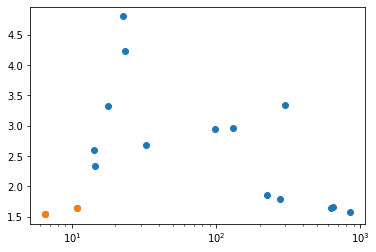

In [100]:
plt.scatter(table4.Mj50, table4.Li_val)
plt.xscale('log')

mask = (table4.Mj50<12)
plt.scatter(table4[mask].Mj50, table4[mask].Li_val)

table4[['sobject_id','ra_dr2','dec_dr2']].to_csv('all_table4.csv',index=False)

In [27]:
tess_ids = {
    1: {'GAIA': 4134444748741183488, 
     'TESS': 78326923,
     'GALAH': 170509005201208},
    2: {'GAIA': 2622883652325300992, 
     'TESS': 205846638,
     'GALAH': 140707003101315},}


In [23]:
pd.read_csv('../files/crossmatch_tess.csv')[['GAIA','TIC','WISEA','2MASS','ra_dr2','dec_dr2','RAJ2000','DEJ2000']]

,GAIA,TIC,WISEA,2MASS,ra_dr2,dec_dr2,RAJ2000,DEJ2000
0,4134444748741183488,78326923,J171459.26-181507.6,17145926-1815075,258.746905,-18.252141,258.746931,-18.252119
1,2622883652325300992,205846638,J222903.80-062524.5,22290380-0625244,337.265875,-6.423480,337.265848,-6.423464


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

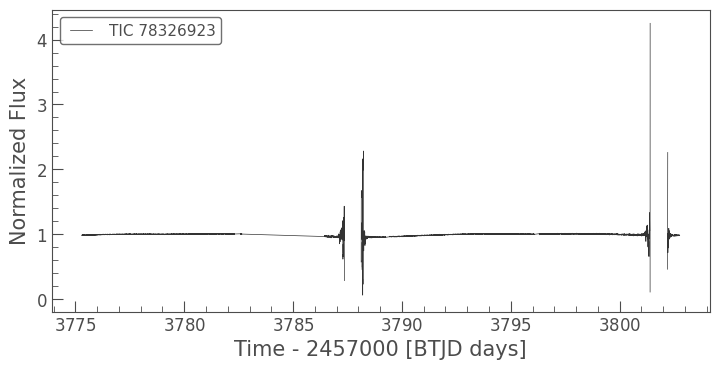

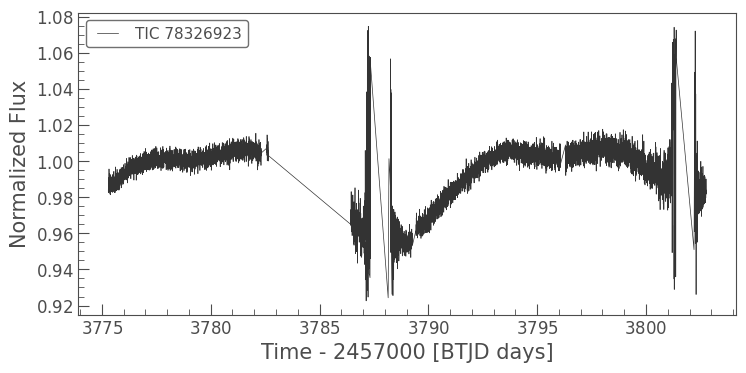

In [81]:
import lightkurve as lk
sr1 = lk.search_lightcurve('TIC 78326923', mission='TESS')
lc1 = sr1.download()
lc1.plot()
lc1 = lc1.remove_nans().remove_outliers() 
lc1.plot()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

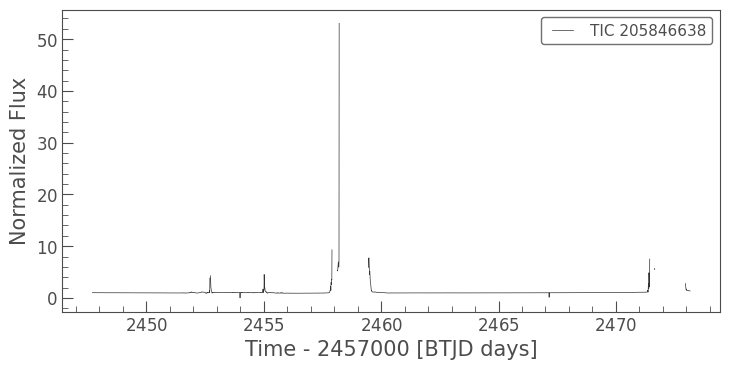

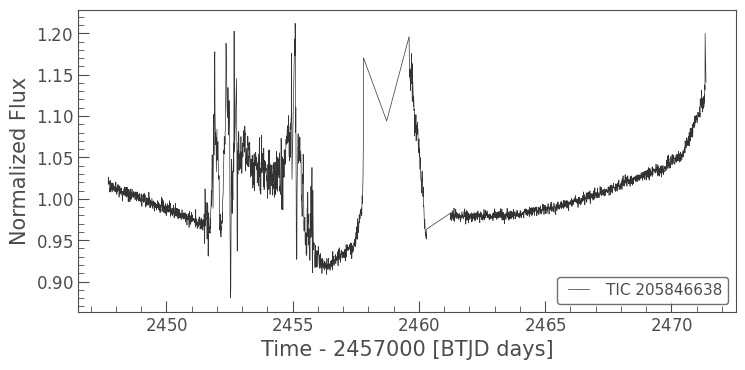

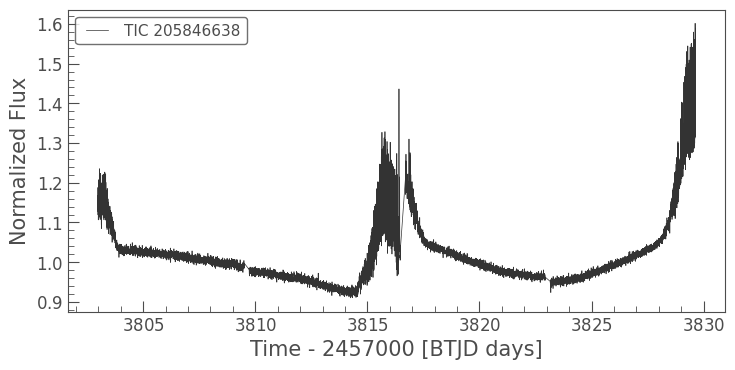

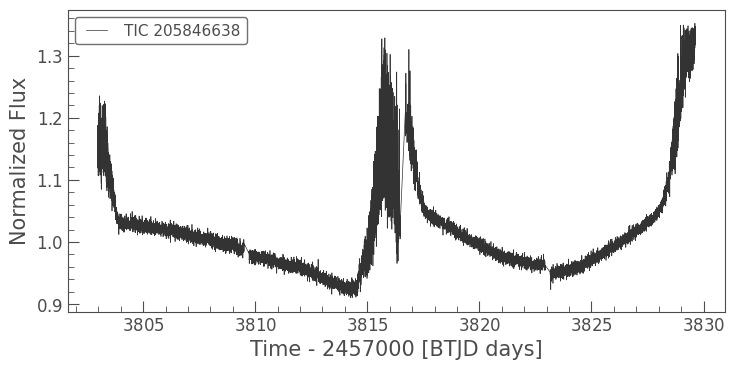

In [83]:
sr2 = lk.search_lightcurve('TIC 205846638', mission='TESS')
lc2 = sr2.download_all()
lc2[0].plot()
lc2a = lc2[0].remove_nans().remove_outliers()
lc2a.plot()

lc2[1].plot()
lc2b = lc2[1].remove_nans().remove_outliers()
lc2b.plot()

In [86]:
print('cadence in days:',np.median(np.diff(lc1['time'].value)))
print('cadence in mins:',np.median(np.diff(lc1['time'].value))*86400./60)
print('cadence in seconds:',np.median(np.diff(lc1['time'].value))*86400.)

cadence in days: 0.002314981728886778
cadence in mins: 3.3335736895969603
cadence in seconds: 200.01442137581762


In [93]:
sr2
print('cadence in days:',np.median(np.diff(lc2[0]['time'].value)))
print('cadence in mins:',np.median(np.diff(lc2[0]['time'].value))*86400./60)
print('cadence in seconds:',np.median(np.diff(lc2[0]['time'].value))*86400.)
print('\n')
print('cadence in days:',np.median(np.diff(lc2[1]['time'].value)))
print('cadence in mins:',np.median(np.diff(lc2[1]['time'].value))*86400./60)
print('cadence in seconds:',np.median(np.diff(lc2[1]['time'].value))*86400.)

cadence in days: 0.0069444245909835445
cadence in mins: 9.999971411016304
cadence in seconds: 599.9982846609782


cadence in days: 0.002315036170557505
cadence in mins: 3.3336520856028073
cadence in seconds: 200.01912513616844


<Axes: xlabel='Frequency [$\\mathrm{\\mu Hz}$]', ylabel='Power [$\\mathrm{ppm}$]'>

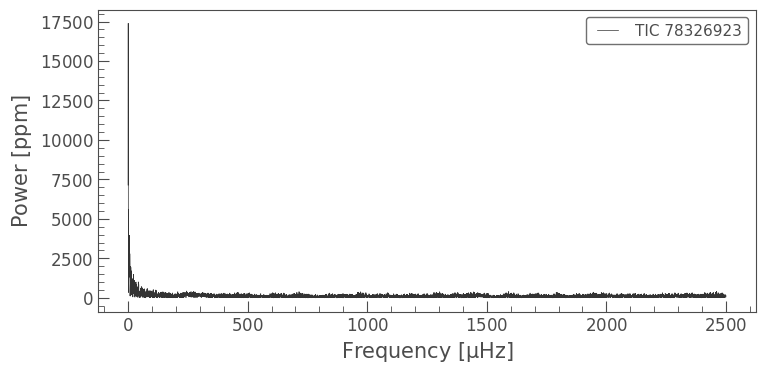

In [97]:
pg1 = lc1.normalize(unit='ppm').to_periodogram(freq_unit=u.microHertz)
pg1.plot()

<Axes: xlabel='Frequency [$\\mathrm{\\mu Hz}$]', ylabel='Power [$\\mathrm{ppm}$]'>

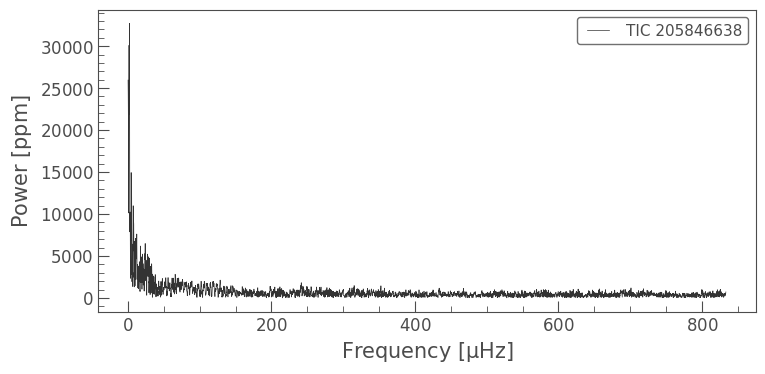

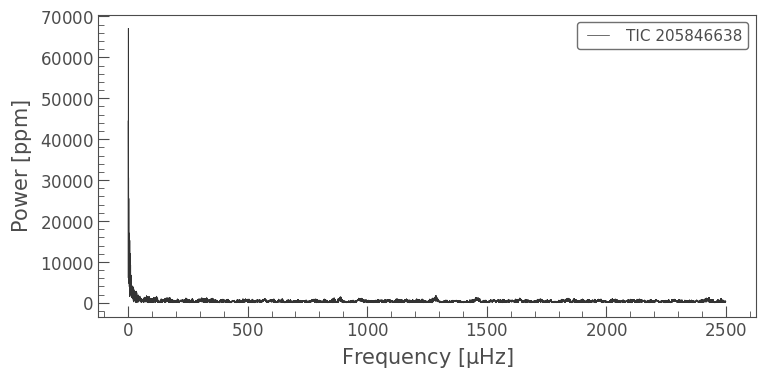

In [96]:
import astropy.units as u

pg2 = lc2a.normalize(unit='ppm').to_periodogram(freq_unit=u.microHertz)
pg2.plot()
pg2 = lc2b.normalize(unit='ppm').to_periodogram(freq_unit=u.microHertz)
pg2.plot()

In [22]:
for c in pd.read_csv('../files/crossmatch_tess.csv').keys():
    print(c)

ra_dr2
dec_dr2
TIC
RAJ2000
DEJ2000
errHalfMaj
errHalfMin
errPosAng
HIP
TYC
UCAC4
2MASS
objID
WISEA
GAIA
APASS
KIC
S/G
Ref
r_Pos
pmRA
e_pmRA
pmDE
e_pmDE
r_pm
Plx
e_Plx
r_Plx
Bmag
e_Bmag
Vmag
e_Vmag
umag
e_umag
gmag_x
e_gmag_x
rmag
e_rmag
imag
e_imag
zmag
e_zmag
Jmag
e_Jmag
Hmag
e_Hmag
Kmag
e_Kmag
q_2MASS
W1mag
e_W1mag
W2mag
e_W2mag
W3mag
e_W3mag
W4mag
e_W4mag
Gmag_xa
e_Gmag_xa
Tmag
e_Tmag
f_Tmag
Flag
Teff
s_Teff
logg
s_logg
[M/H]
e_[M/H]
Rad
s_Rad
Mass
s_Mass
rho
s_rho
LClass
Lum
s_Lum
Dist
s_Dist
E(B-V)
s_E(B-V)
Ncont
Rcont
Disp
m_TIC
Prior
e_E(B-V)_x
E_E(B-V)_xa
f_E(B-V)
e_Mass_x
E_Mass_xa
e_Rad_x
E_Rad_xa
e_rho_x
E_rho_xa
e_logg_x
E_logg_xa
e_Lum_x
E_Lum_xa
e_Dist_x
E_Dist_xa
r_Dist
e_Teff_x
E_Teff_xa
r_Teff
BPmag
e_BPmag
RPmag
e_RPmag
q_Gaia
r_Vmag
r_Bmag
Clist
e_RAJ2000
e_DEJ2000
RAOdeg
DEOdeg
e_RAOdeg
e_DEOdeg
RadFl
WDFl
ID
angDist


In [208]:
si = all_tics[all_tics.TIC==167669457]['sobject_id'].values[0]
print(si)
print(table4[table4.sobject_id==si].Mj50.values[0])
print(table4[table4.sobject_id==si].P50.values[0])
print(table4[table4.sobject_id==si].radius_bstep.values[0])


170602003701360
98.35242640139252
645.7894263564455
36.55451677014533


In [207]:
plt.rcParams['figure.facecolor'] = 'white'
np.sort(all_tics.TIC)
# 2335-2352

array([ 34732287,  38023437,  78326923,  83864042, 129040309, 165063707,
       167669457, 205846638, 306791669, 361334013, 369985256, 397526519,
       405924915, 412764815, 427449567, 451423147])

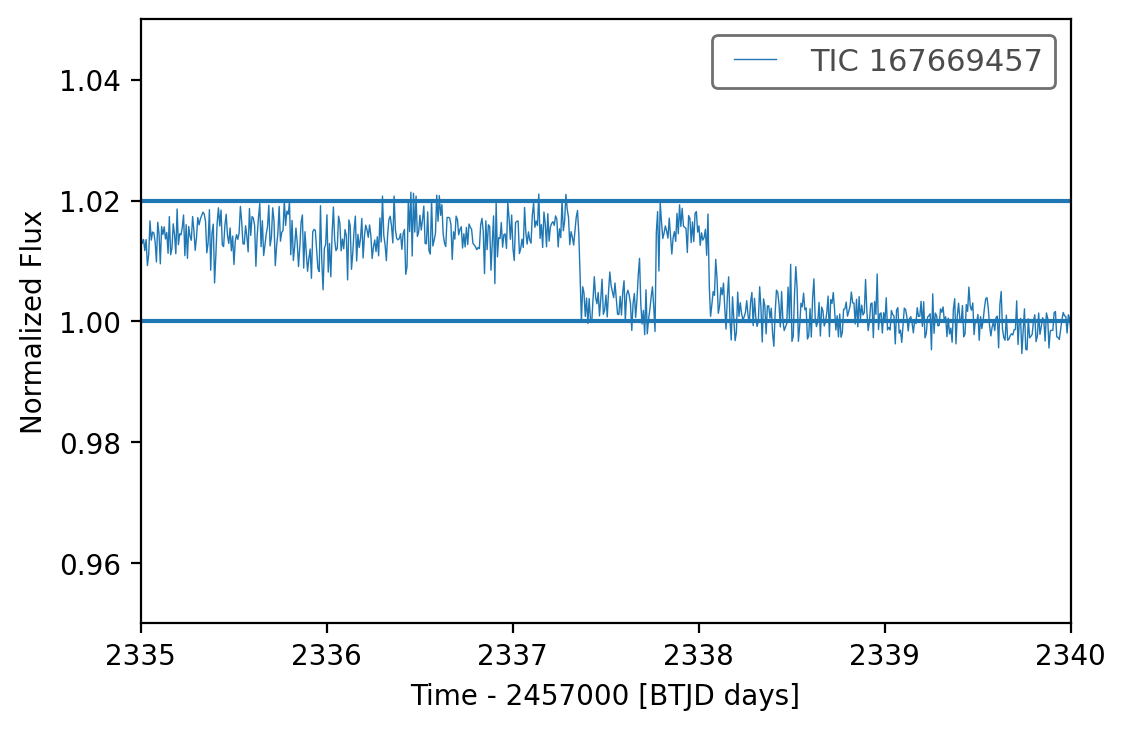

In [217]:
def dd2(tic):
    sr = lk.search_lightcurve('TIC %s'%tic, mission='TESS')
    lc = sr.download_all()
    #lc[1].plot()
    plt.figure(dpi=200)
    ax=plt.subplot(111)
    lc[1].plot(ax=ax,normalize=True)
    ax.set_xlim(2335,2340)
    ax.set_ylim(0.95,1.05)
    ax.axhline(1.02)
    ax.axhline(1.0)
dd2(167669457)

7


/opt/miniconda3/lib/python3.9/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=1.43e+01 ppm +/- 1.51e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-5.55e-11 ppm +/- 2.43e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-5.55e-11 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(


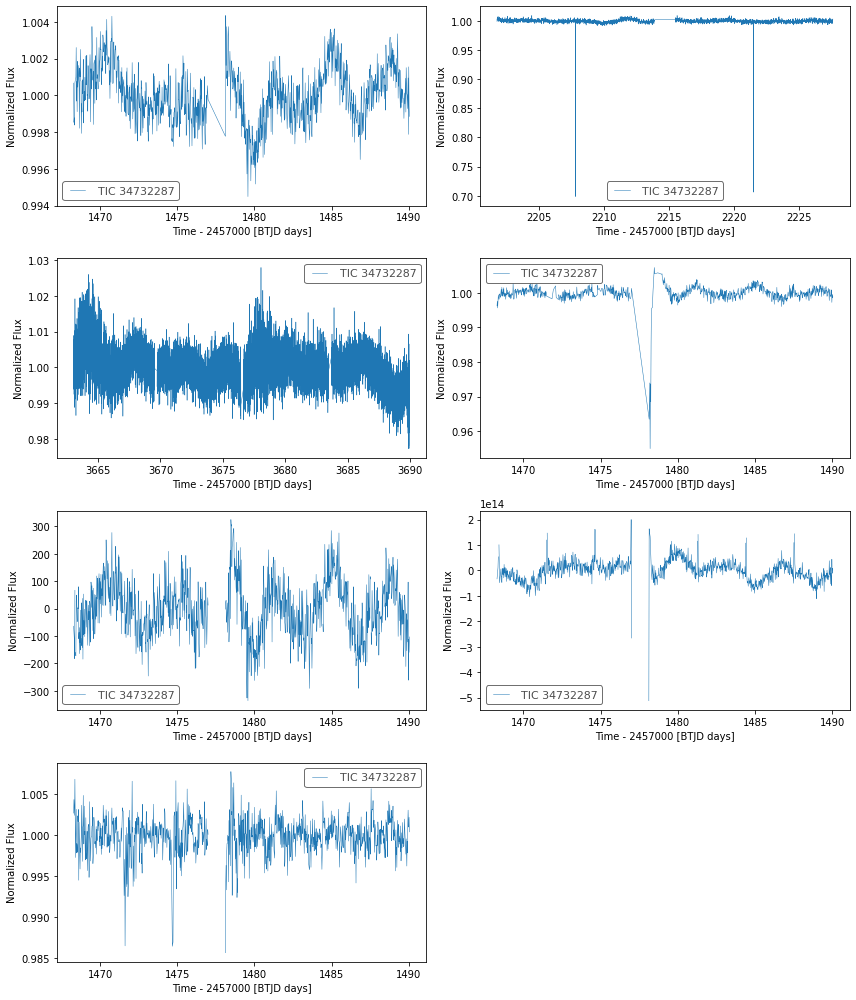

8
Not recognized as a supported data product:
/Users/maryumsayeed/.lightkurve/cache/mastDownload/HLSP/hlsp_t16_tess_ffi_s0001-cam1-ccd1-06579575475802939392_tess_v01/hlsp_t16_tess_ffi_s0001-cam1-ccd1-06579575475802939392_tess_v01_llc.fits
This file may be corrupt due to an interrupted download. Please remove it from your disk and try again.
7


/opt/miniconda3/lib/python3.9/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=1.17e+01 ppm +/- 1.78e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=1.11e-10 ppm +/- 6.03e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(


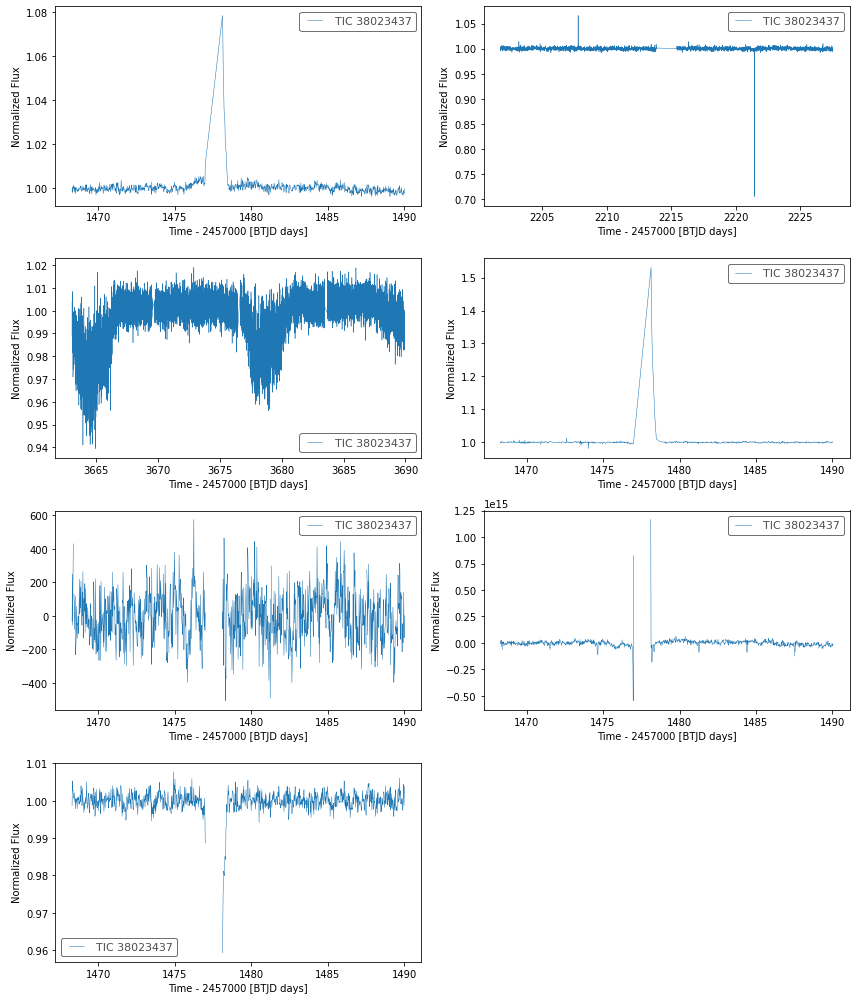

7


TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
/opt/miniconda3/lib/python3.9/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=1.02e+03 ppm +/- 4.11e+04 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=0.00e+00 ppm +/- 9.26e+04 ppm); `normalize()` will divide the light curve by a value close to zero,

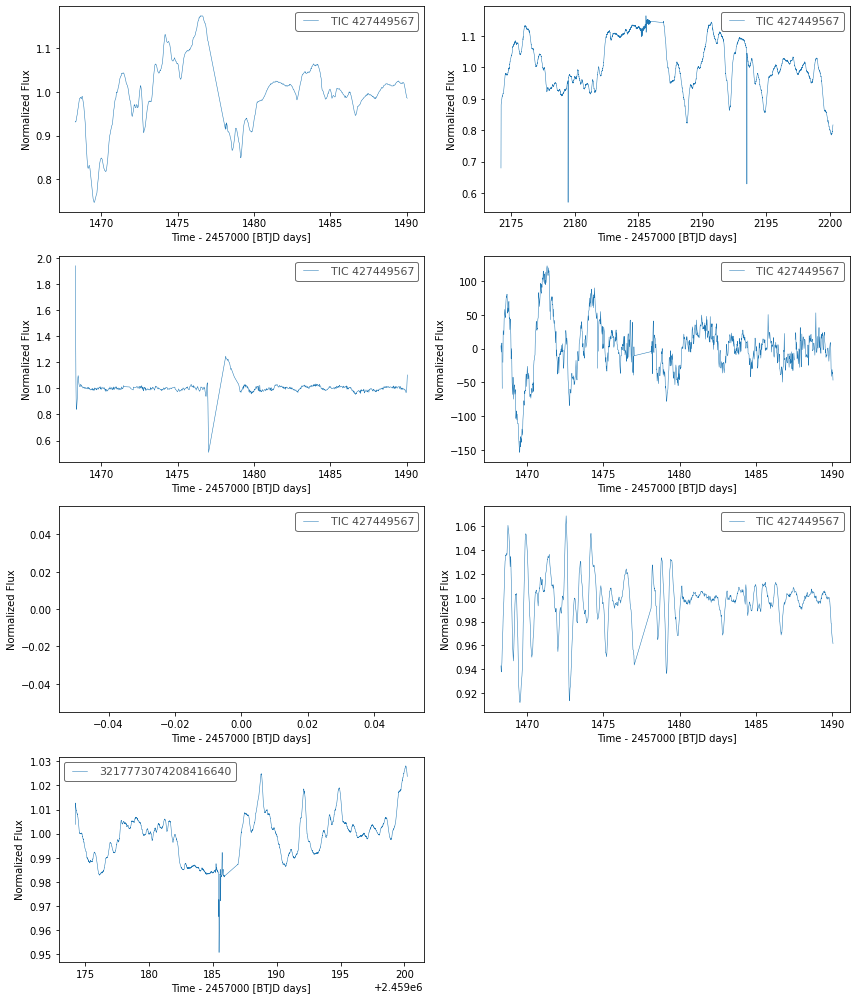

8


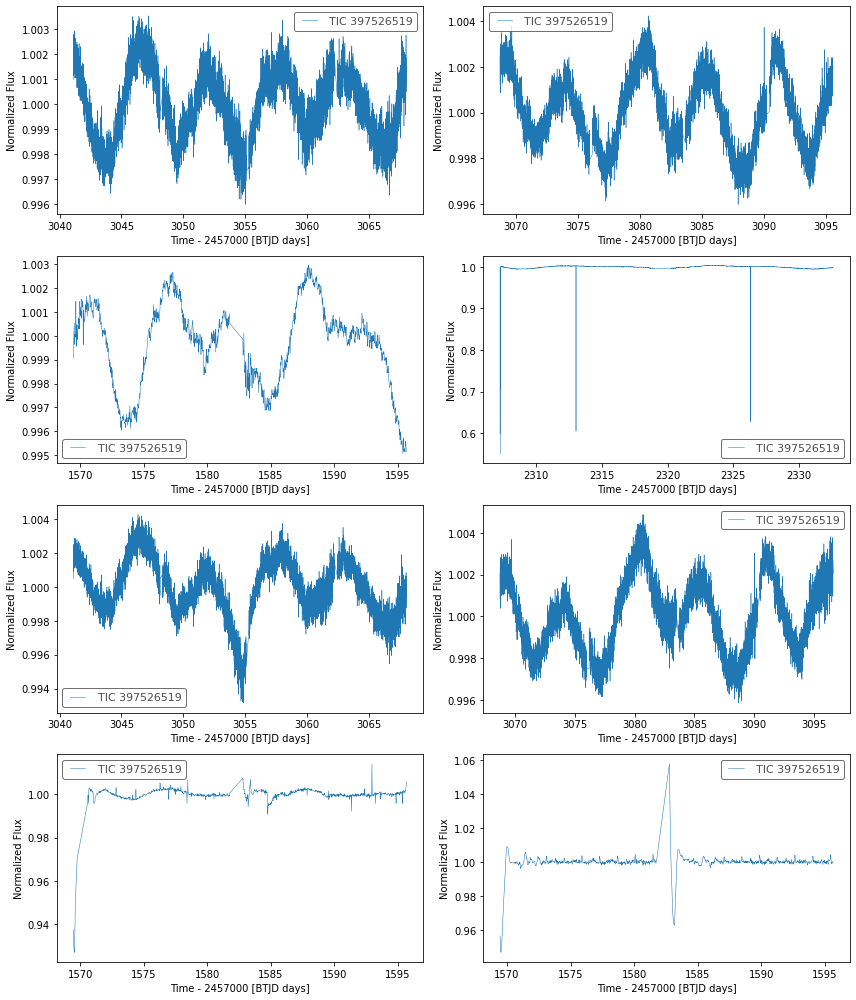

4


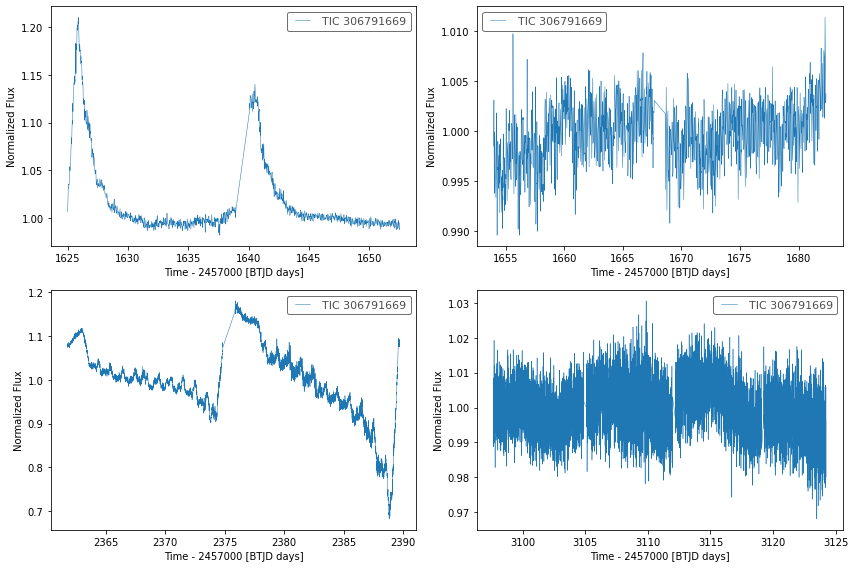

4


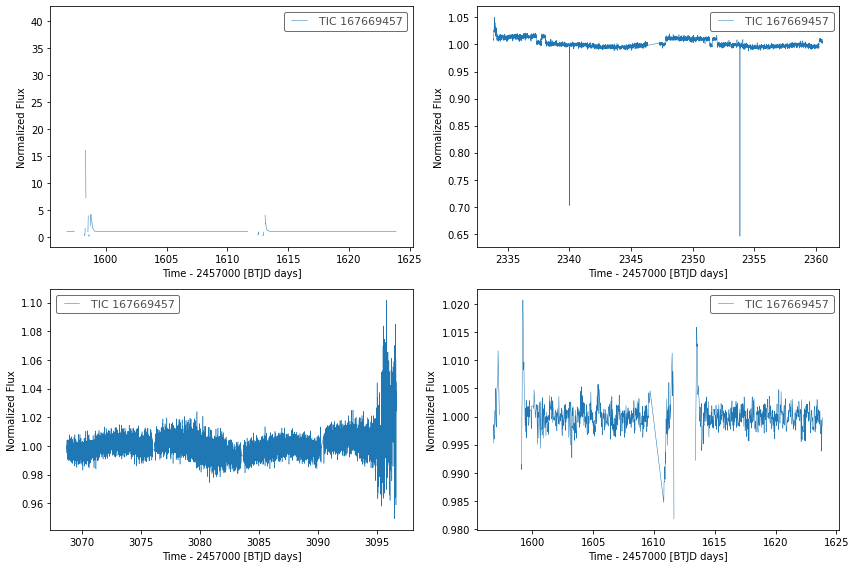

3


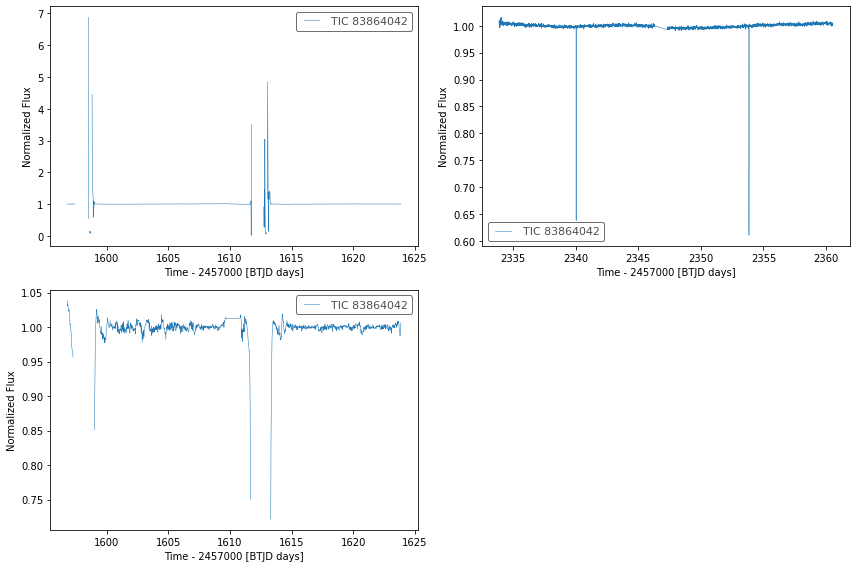

2


/opt/miniconda3/lib/python3.9/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=1.00e+00 +/- 2.17e+01); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(


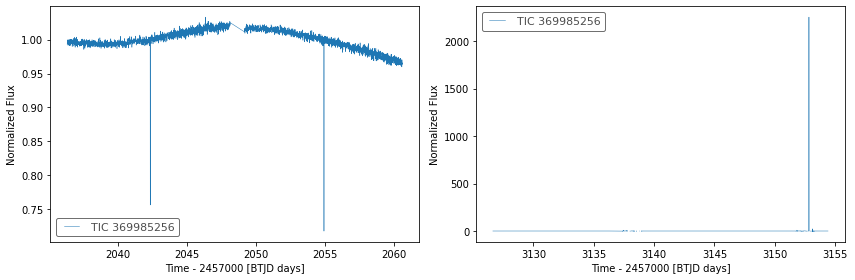

2


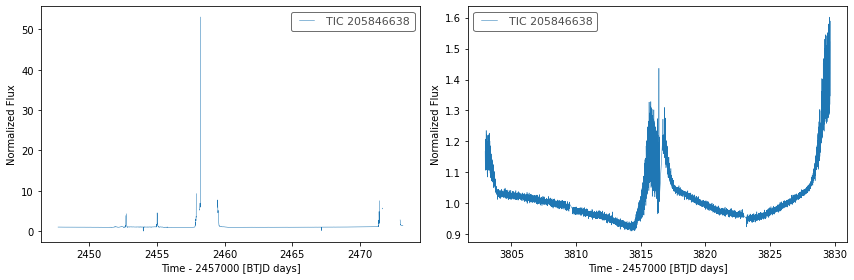

1


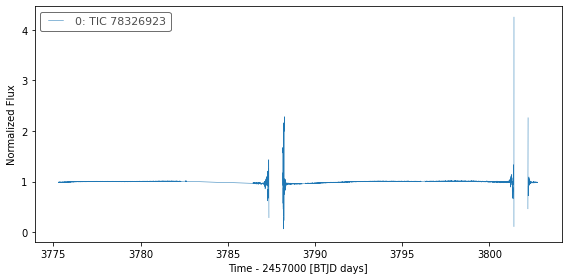

2


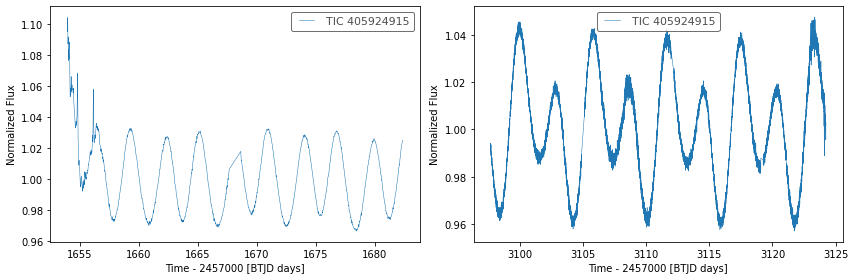

5


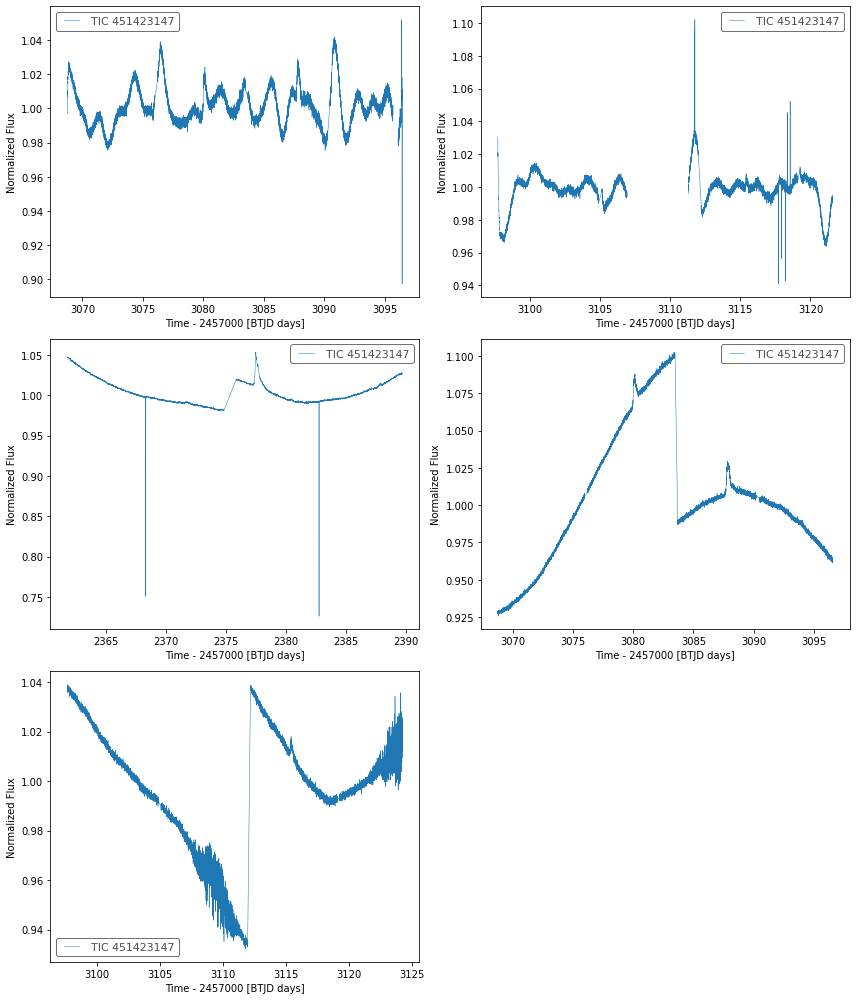

4


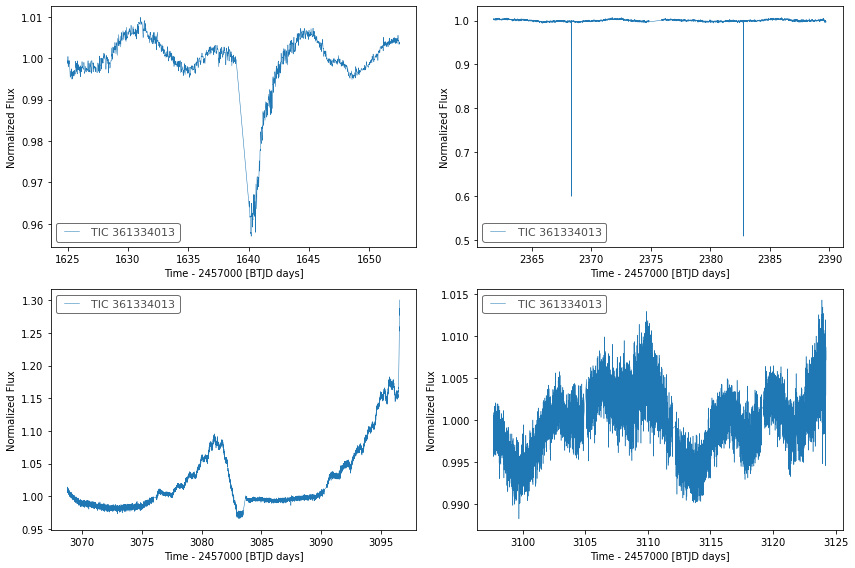

2


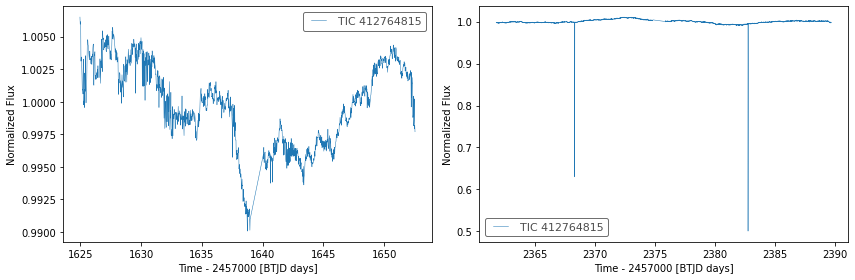

3


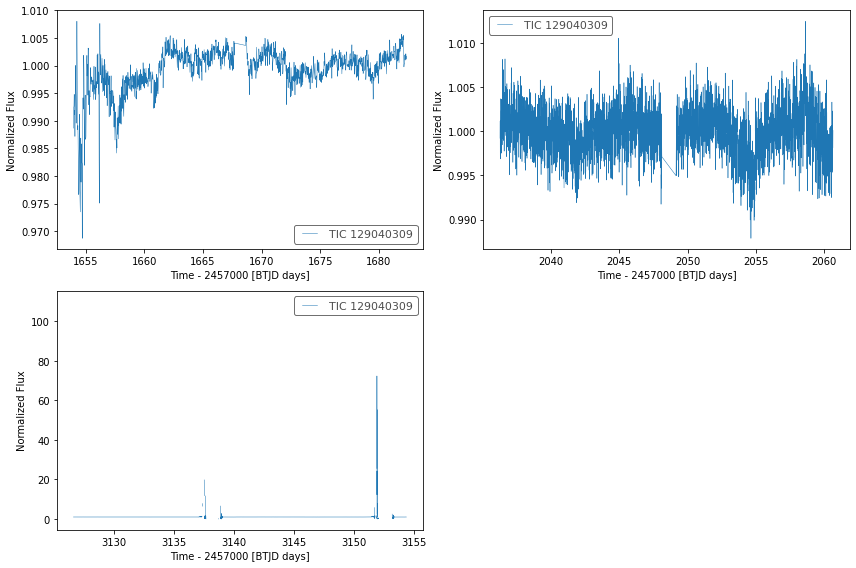

In [177]:
def make_ind_plots():
    
    
    for i,tic in enumerate(np.sort(all_tics.TIC)):

        try:
            sr = lk.search_lightcurve('TIC %s'%tic, mission='TESS')
            print(len(sr))
            if len(sr) == 1:
                lc = sr.download_all()
                plt.figure(figsize=(8,4))
                ax = plt.subplot(1,1,1)
                lc.plot(ax=ax,normalize=True)
                plt.tight_layout()
                plt.savefig('../plots/tess_lcs/%s.png'%tic,bbox_inches='tight',dpi=200)
                plt.show()
                rows, cols = 1, 1
            elif len(sr)%2 == 0:#even
                rows, cols = int(len(sr) / 2), 2
                
                lcs = sr.download_all()
                if len(sr) ==2:
                    figsize=(12,4)
                elif len(sr) ==4:
                    figsize=(12,8)
                elif len(sr) > 4:
                    figsize=(12,14)
                
                fig = plt.figure(figsize=figsize)
                for ii, lc in enumerate(lcs):
                    ax=plt.subplot(rows,cols,ii+1)
                    lc.plot(ax=ax,normalize=True)
                plt.tight_layout()
                plt.savefig('../plots/tess_lcs/%s.png'%tic,bbox_inches='tight',dpi=200)
                plt.show()
                
            elif len(sr)%2 == 1:#odd
                rows, cols = int((len(sr)+1)/2), 2
                
                lcs = sr.download_all()
                if len(sr) == 3:
                    figsize=(12,8)
                elif len(sr) > 4:
                    figsize=(12,14)
                
                fig = plt.figure(figsize=figsize)
                for ii, lc in enumerate(lcs):
                    ax=plt.subplot(rows,cols,ii+1)
                    lc.plot(ax=ax,normalize=True)
                plt.tight_layout()
                plt.savefig('../plots/tess_lcs/%s.png'%tic,bbox_inches='tight',dpi=200)
                plt.show()
                
#     #         lc[2].plot(ax=ax,normalize=True)
#     #         #ax.set_xlim(2339, 2341)
#     #         plt.show()
#             print(len(sr))
#             for l in lc:
#                 l = l.remove_nans()#.remove_outliers() 
#                 l.plot()
        except Exception as e:
            print(e)
make_ind_plots()

In [142]:
print(all_tics.TIC.tolist())

[34732287, 165063707, 38023437, 427449567, 397526519, 306791669, 167669457, 83864042, 369985256, 205846638, 78326923, 405924915, 451423147, 361334013, 412764815, 129040309]


In [144]:
all_tics = pd.read_csv('../files/crossmatch_tess_all_binaries.csv')#[['GAIA','TIC','WISEA','2MASS','ra_dr2','dec_dr2','RAJ2000','DEJ2000']]

def download_data(tic=False):
    if tic:
        try:
            sr = lk.search_lightcurve('TIC %s'%tic, mission='TESS')
            lc = sr.download_all()
            lc.plot()

    #         lc[2].plot(ax=ax,normalize=True)
    #         #ax.set_xlim(2339, 2341)
    #         plt.show()
            print(len(sr))
            for l in lc:
                l = l.remove_nans()#.remove_outliers() 
                l.plot()
        except Exception as e:
            print(e)
            
    else:
        for i, row in all_tics.iterrows():
            tic = row['TIC']
            print(i,tic)
            try:
                sr1 = lk.search_lightcurve('TIC %s'%tic, mission='TESS')
                print(len(sr1))
                lc1 = sr1.download_all()
                lc1.plot()
            except Exception as e:
                print(e)

    #         lc1.plot()
    #         



0 34732287
7


/opt/miniconda3/lib/python3.9/site-packages/lightkurve/collections.py:263: LightkurveWarning: Some but not all of the light curves in the collection appear to be normalized. You may wish to use `normalize=True` to ensure all are normalized.
  warnings.warn(


1 165063707
8
Not recognized as a supported data product:
/Users/maryumsayeed/.lightkurve/cache/mastDownload/HLSP/hlsp_t16_tess_ffi_s0001-cam1-ccd1-06579575475802939392_tess_v01/hlsp_t16_tess_ffi_s0001-cam1-ccd1-06579575475802939392_tess_v01_llc.fits
This file may be corrupt due to an interrupted download. Please remove it from your disk and try again.
2 38023437
7


/opt/miniconda3/lib/python3.9/site-packages/lightkurve/collections.py:263: LightkurveWarning: Some but not all of the light curves in the collection appear to be normalized. You may wish to use `normalize=True` to ensure all are normalized.
  warnings.warn(
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]


3 427449567
7


TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
/opt/miniconda3/lib/python3.9/site-packages/lightkurve/collections.py:263: LightkurveWarning: Some but not all of the light curves in the collection appear to be normalized. You may wish to use `normalize=True` to ensure all are normalized.
  warnings.warn(


4 397526519
8


/opt/miniconda3/lib/python3.9/site-packages/lightkurve/collections.py:263: LightkurveWarning: Some but not all of the light curves in the collection appear to be normalized. You may wish to use `normalize=True` to ensure all are normalized.
  warnings.warn(


5 306791669
4
6 167669457
4
7 83864042
3
8 369985256
2
9 205846638
2
10 78326923
1
11 405924915
2
12 451423147
5


/opt/miniconda3/lib/python3.9/site-packages/lightkurve/collections.py:263: LightkurveWarning: Some but not all of the light curves in the collection appear to be normalized. You may wish to use `normalize=True` to ensure all are normalized.
  warnings.warn(


13 361334013
4
14 412764815
2
15 129040309
3


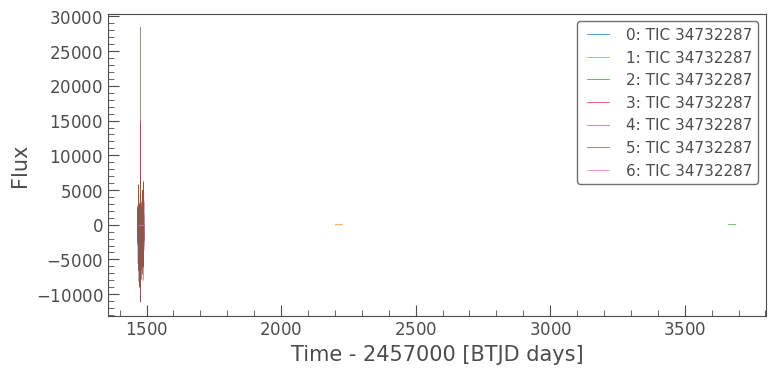

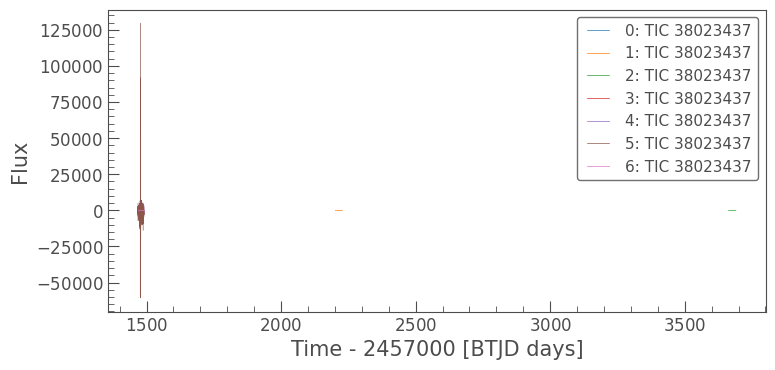

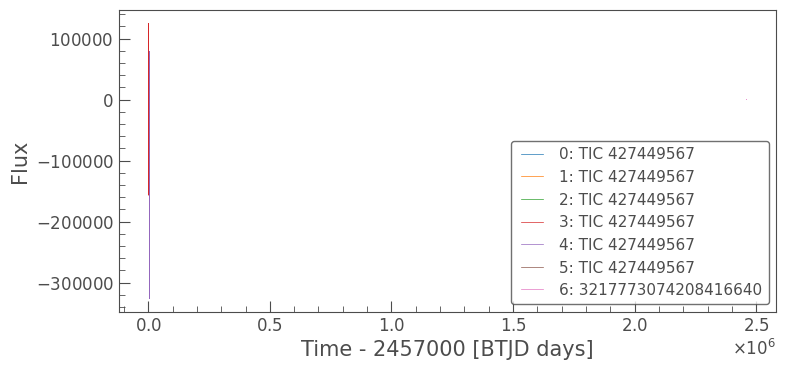

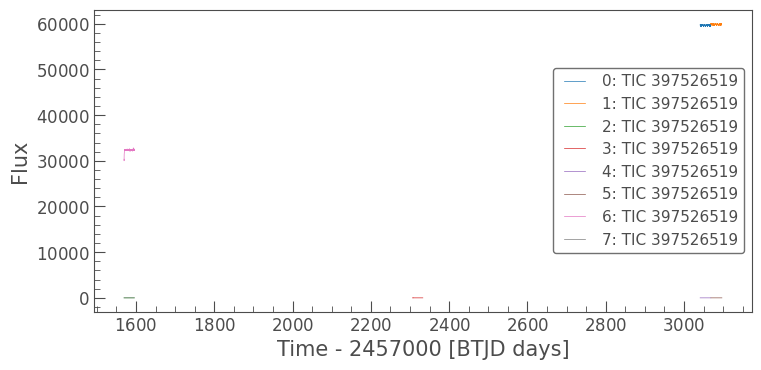

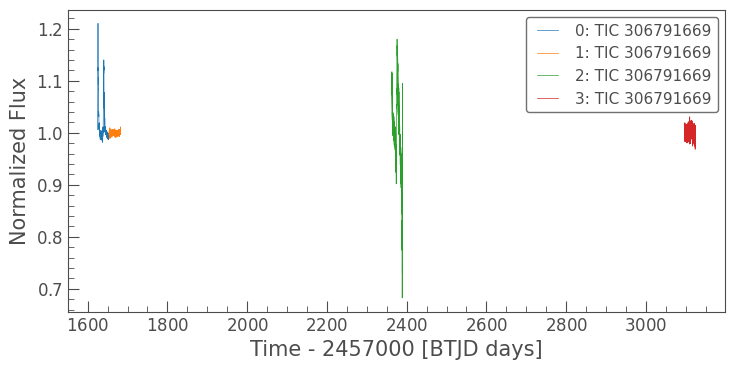

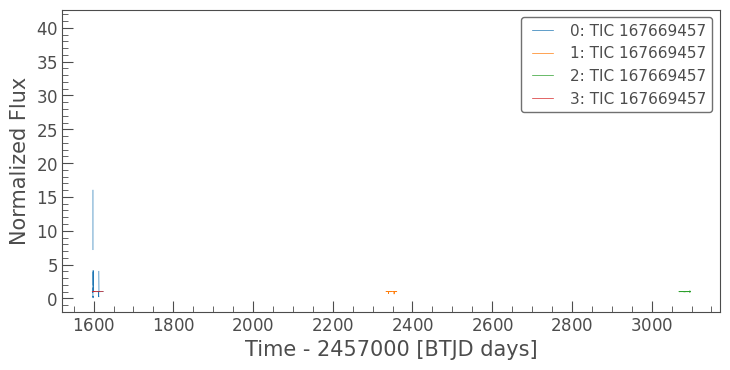

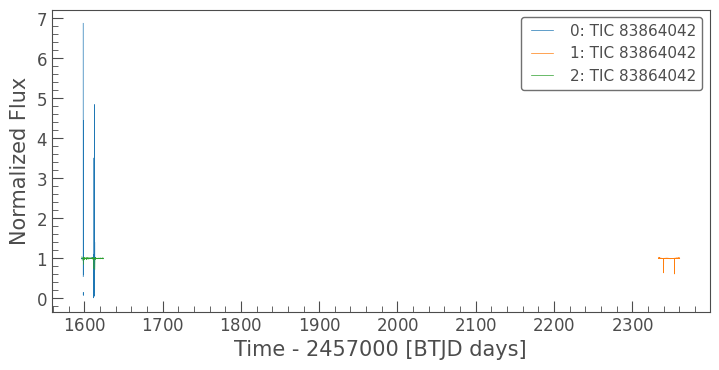

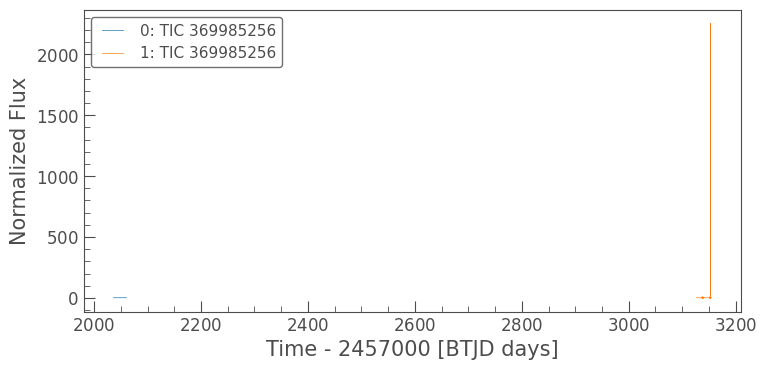

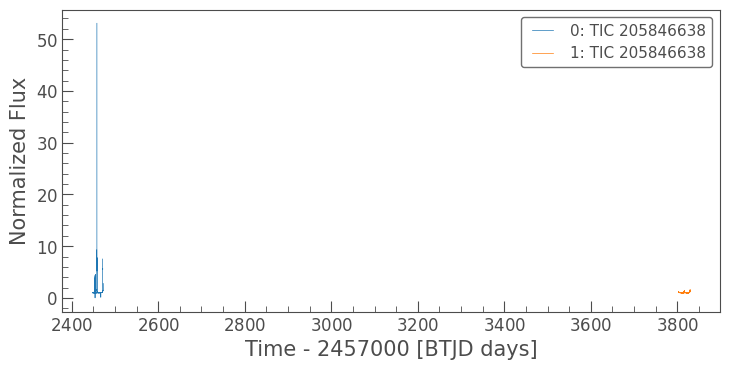

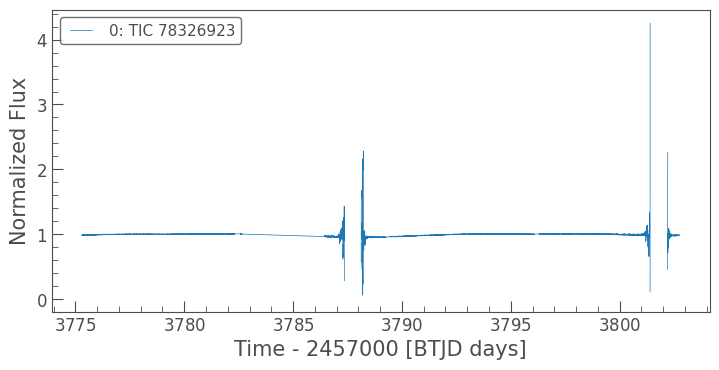

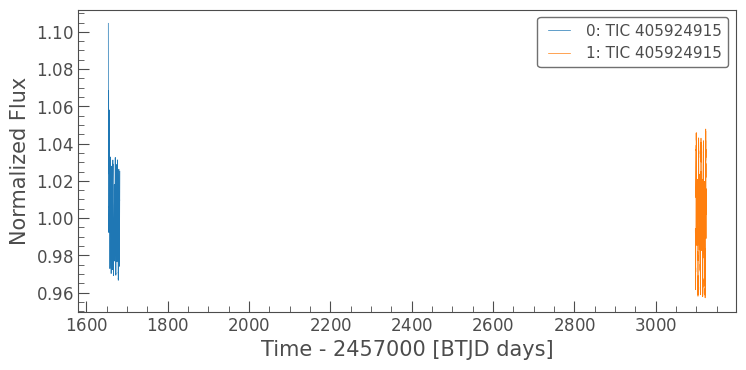

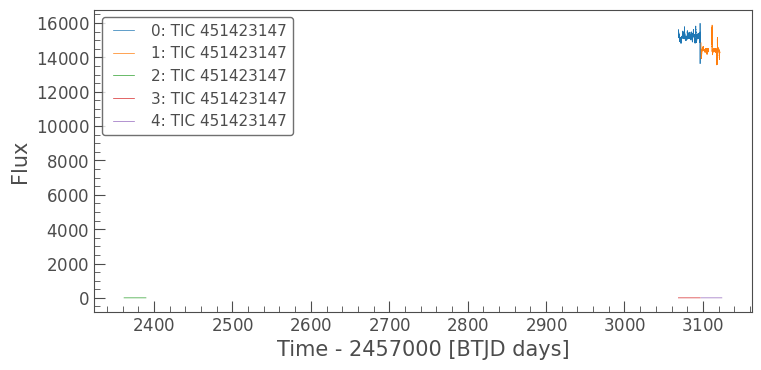

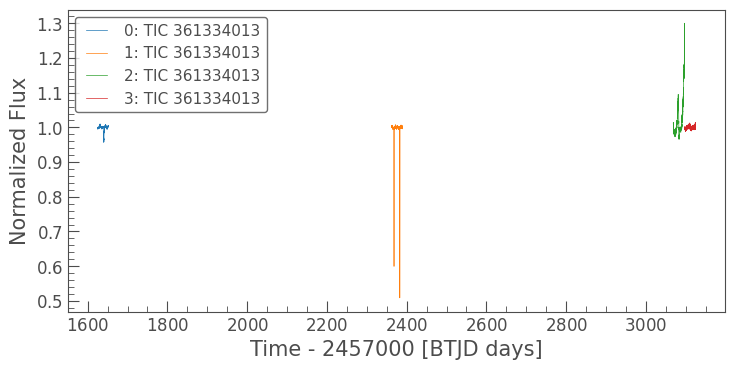

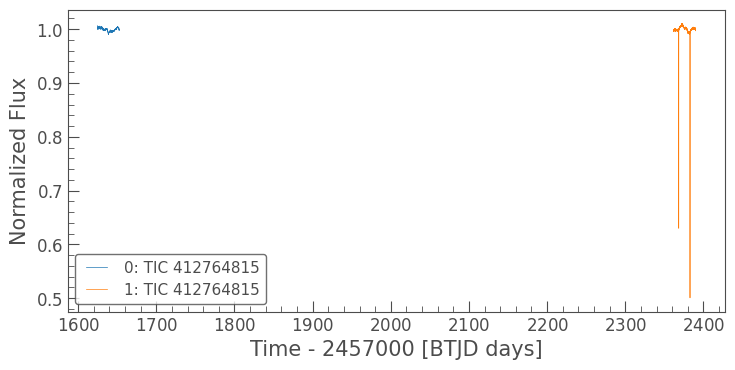

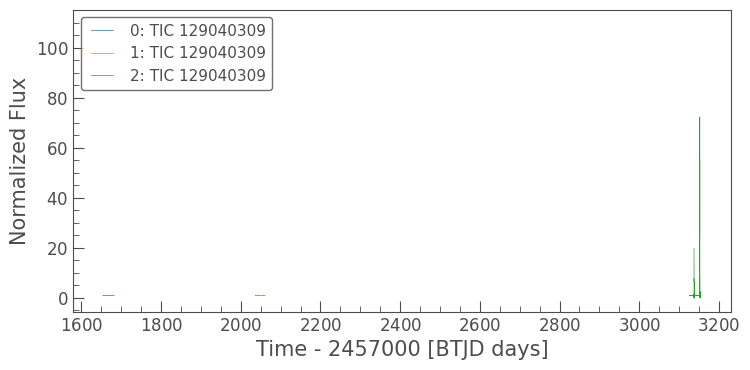

In [136]:
download_data()
